In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from turtle import color
from sklearn.linear_model import LinearRegression


In [36]:
data = pd.read_csv("EntireHomeApt.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.2                                  1748 non-null   int64  
 1   Unnamed: 0.1                                  1748 non-null   int64  
 2   name                                          1748 non-null   object 
 3   description                                   1748 non-null   object 
 4   neighborhood_overview                         1748 non-null   object 
 5   host_name                                     1748 non-null   object 
 6   host_location                                 1748 non-null   object 
 7   host_response_time                            1748 non-null   object 
 8   host_response_rate                            1748 non-null   object 
 9   host_acceptance_rate                          1748 non-null   f

In [37]:
# Elimino las columnas que no voy a utilizar
colums = ['room_type',
'price',
'host_response_rate',
'host_is_superhost',
'host_acceptance_rate',
'bathrooms_text',
'review_scores_cleanliness',
'host_identity_verified',
'instant_bookable',
'property_type']

data = data[colums]

In [38]:
data = data.copy()
data_2 = data.copy()
data_3= data.copy()
data_4 = data.copy()
data_5 = data.copy()
data_6 = data.copy()

In [ ]:
#imprimimos el scarlert plot entre la variable dependiente (total) e independiente (alcohol)
#Dependiente es la que se quiere predecir y la independiente es aquella que puede aportar información para hacer un análisis 


sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data)


In [40]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data[['host_acceptance_rate']]
Var_Dep = data['price']


In [41]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [42]:
type(model)

sklearn.linear_model._base.LinearRegression

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.07513932]),
 'rank_': 1,
 'singular_': array([891.63274852]),
 'intercept_': 165.65977441790972}

In [45]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.00015741311059658258

In [46]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([172.7228705 , 172.3471739 , 171.67092002, ..., 167.38797878,
       172.79800982, 173.17370642])

In [47]:
#Se inserta la columna "Predicciones" al dataframe
data.insert(0, 'Predicciones',y_pred)
data

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,172.722870,Entire home/apt,185.0,100%,1.0,94.0,1 bath,4.970000,1.0,0.0,Entire rental unit
1,172.347174,Entire home/apt,200.0,100%,0.0,89.0,1 bath,5.000000,1.0,0.0,Entire home
2,171.670920,Entire home/apt,66.0,100%,1.0,80.0,1 bath,4.780000,1.0,0.0,Entire home
3,172.647731,Entire home/apt,91.0,100%,0.0,93.0,1 bath,4.890000,1.0,0.0,Entire home
4,172.647731,Entire home/apt,129.0,100%,0.0,93.0,1 bath,4.910000,1.0,1.0,Entire townhouse
...,...,...,...,...,...,...,...,...,...,...,...
1743,172.948288,Entire home/apt,242.0,97%,0.0,97.0,3 baths,4.762193,1.0,1.0,Entire home
1744,172.948288,Entire home/apt,210.0,97%,0.0,97.0,4.5 baths,4.762193,1.0,0.0,Entire home
1745,167.387979,Entire home/apt,127.0,80%,0.0,23.0,1 bath,4.762193,1.0,0.0,Entire home
1746,172.798010,Entire home/apt,159.0,100%,0.0,95.0,1 bath,4.762193,1.0,0.0,Entire rental unit


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

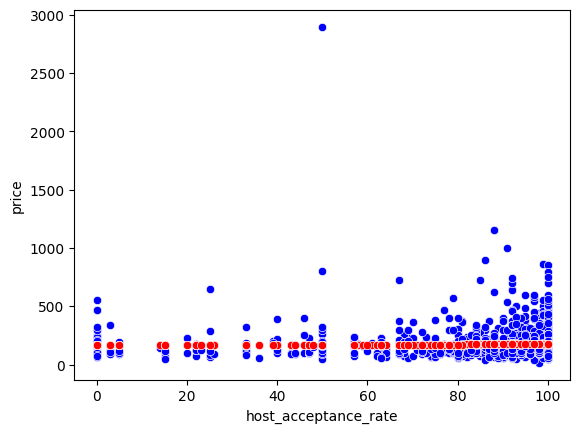

In [48]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=data)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [49]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00015741311059658258

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.012546438163741238

In [51]:
#Eliminamos columna de tipo string
data1=data.drop(data.select_dtypes(include=['object']).columns, axis=1)


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

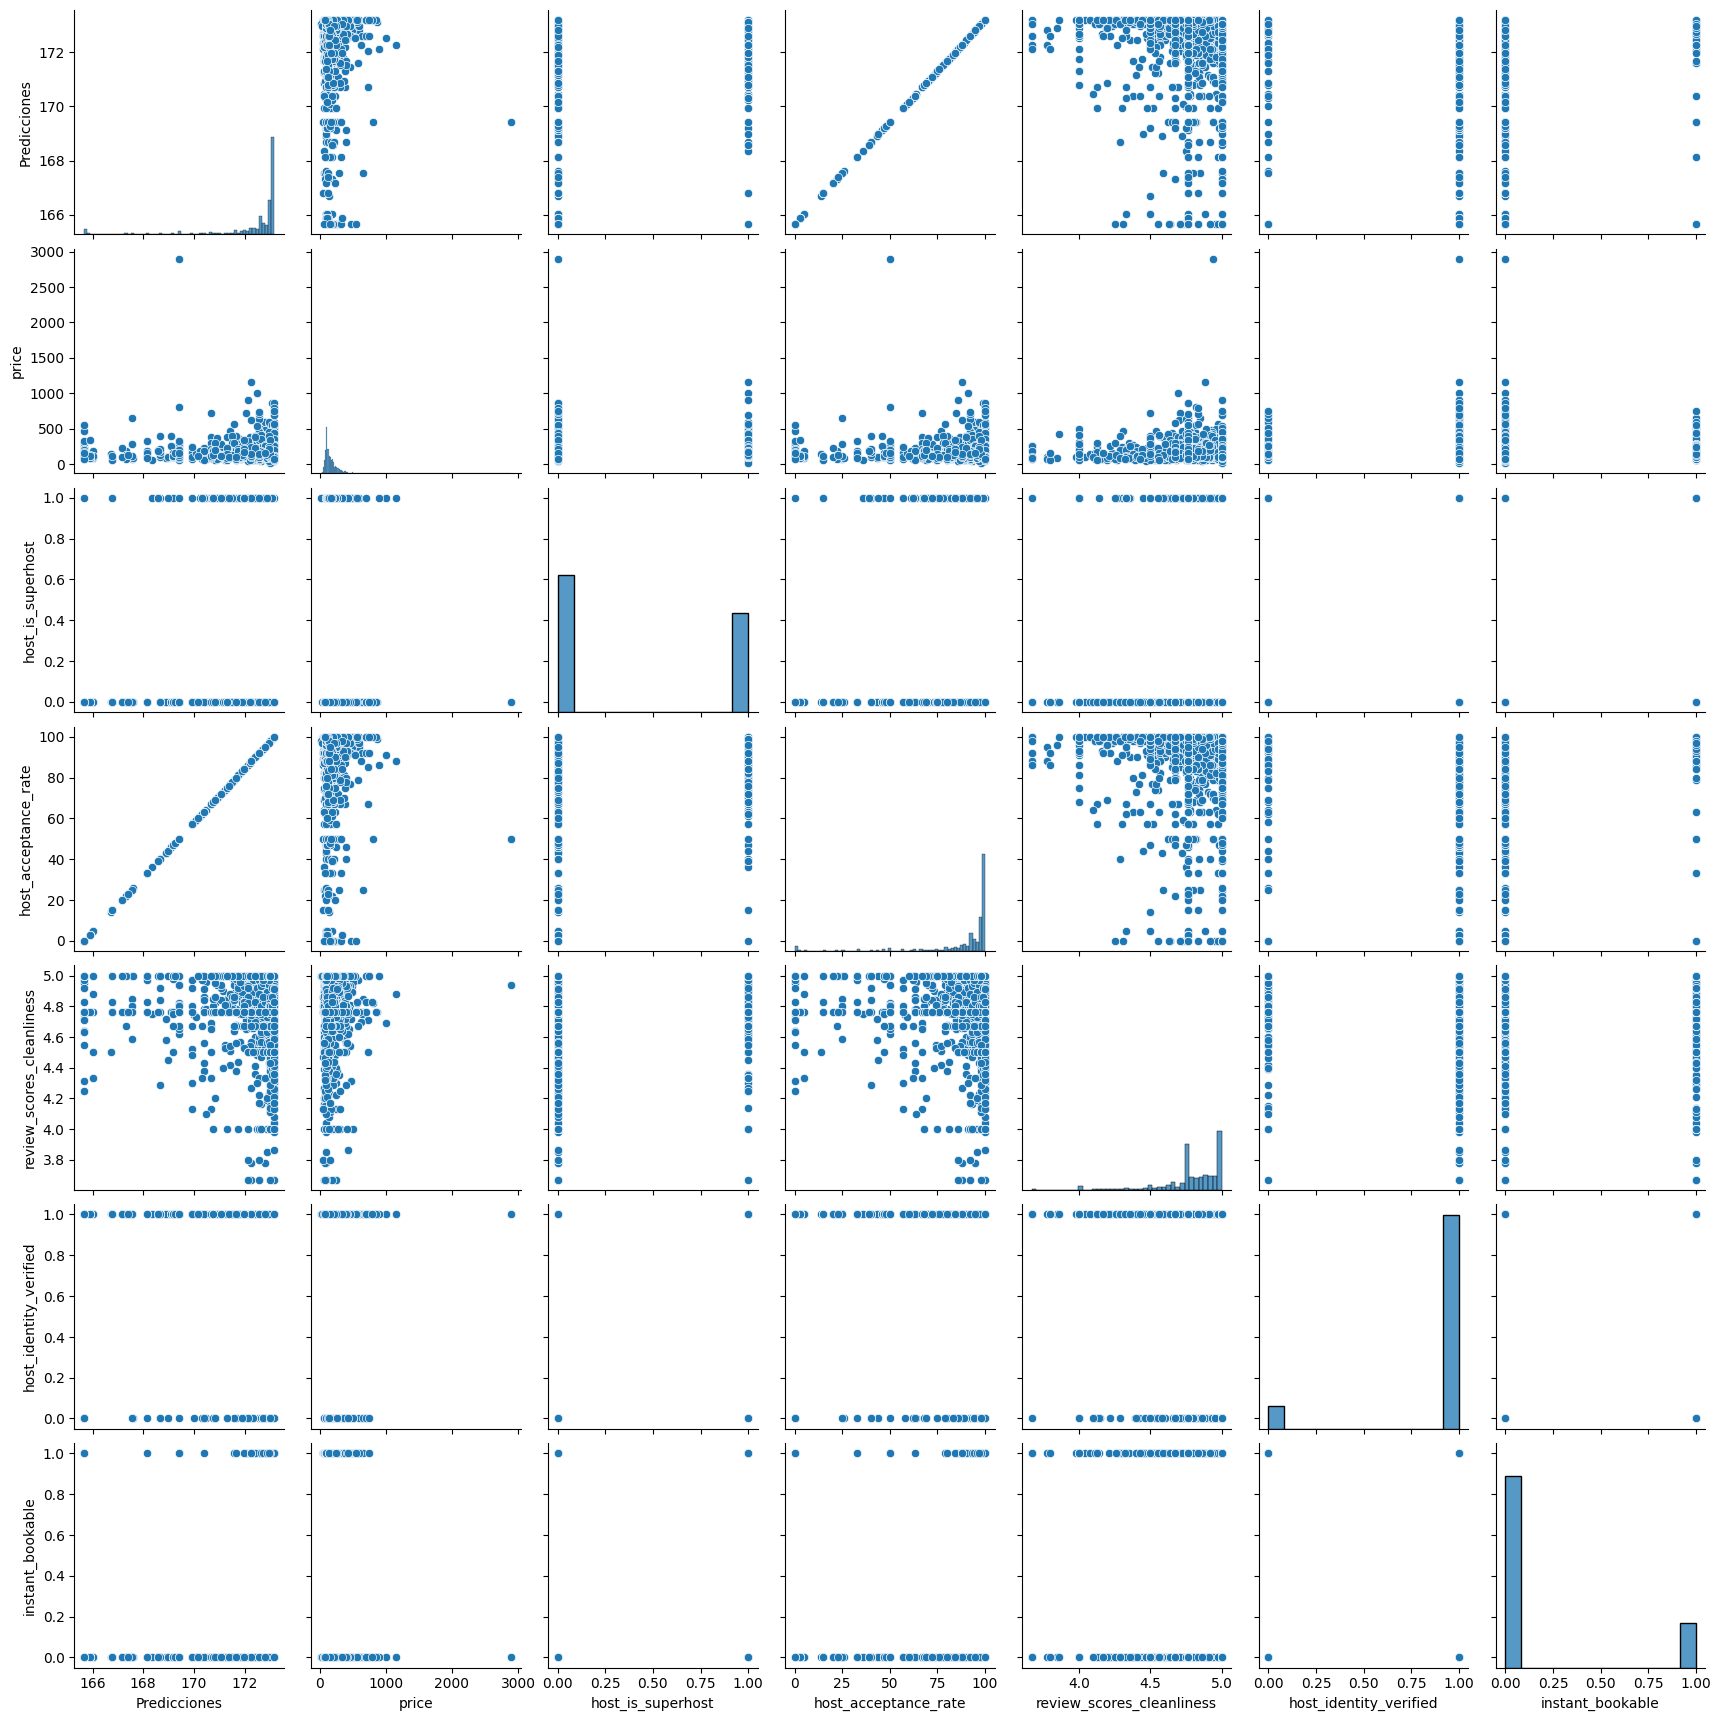

In [52]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data1)

In [53]:
#Correlaci9ones entre variables
Corr_Factors=data1.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.012546,0.178460,1.000000,0.004703,-0.022903,0.190376
price,0.012546,1.000000,-0.020546,0.012546,0.037768,-0.040057,0.025445
host_is_superhost,0.178460,-0.020546,1.000000,0.178460,0.263143,0.193709,-0.032513
host_acceptance_rate,1.000000,0.012546,0.178460,1.000000,0.004703,-0.022903,0.190376
review_scores_cleanliness,0.004703,0.037768,0.263143,0.004703,1.000000,0.005358,-0.095735
host_identity_verified,-0.022903,-0.040057,0.193709,-0.022903,0.005358,1.000000,-0.155858
instant_bookable,0.190376,0.025445,-0.032513,0.190376,-0.095735,-0.155858,1.000000


In [54]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.012546,0.178460,1.000000,0.004703,0.022903,0.190376
price,0.012546,1.000000,0.020546,0.012546,0.037768,0.040057,0.025445
host_is_superhost,0.178460,0.020546,1.000000,0.178460,0.263143,0.193709,0.032513
host_acceptance_rate,1.000000,0.012546,0.178460,1.000000,0.004703,0.022903,0.190376
review_scores_cleanliness,0.004703,0.037768,0.263143,0.004703,1.000000,0.005358,0.095735
host_identity_verified,0.022903,0.040057,0.193709,0.022903,0.005358,1.000000,0.155858
instant_bookable,0.190376,0.025445,0.032513,0.190376,0.095735,0.155858,1.000000


<Axes: >

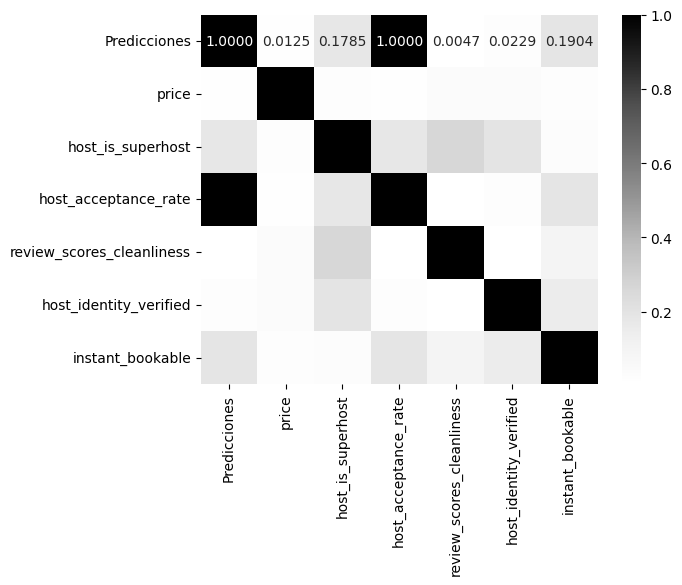

In [55]:
sns.heatmap(Corr_Factors1, cmap = "Grays", annot = True, fmt = ".4f")

**REGRESIÓN PRICE VS HOST_IS_SUPERHOST**

<Axes: xlabel='host_is_superhost', ylabel='price'>

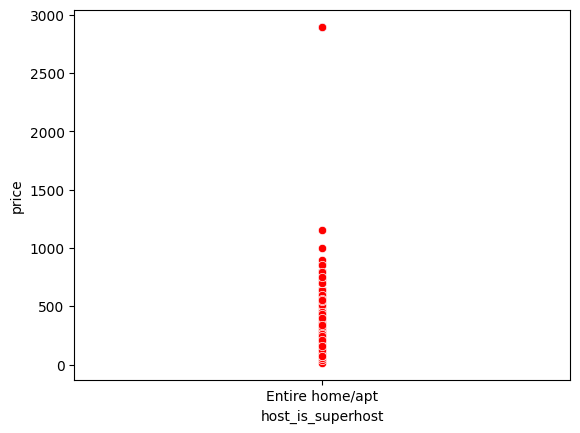

In [66]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=data_2)
sns.scatterplot(x='room_type', y='price', color='red', data=data_2)

In [67]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_2[['host_is_superhost']]
Var_Dep = data_2['price']

In [68]:
model=LinearRegression()

In [69]:
#verificamos la función relacoanda al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [70]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [71]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.31698993]),
 'rank_': 1,
 'singular_': array([20.63461134]),
 'intercept_': 174.56903353057203}

**modelo matemático**

In [72]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.00042214205587998155

In [73]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([169.2520436 , 174.56903353, 169.2520436 , ..., 174.56903353,
       174.56903353, 174.56903353])

In [74]:
#Se inserta la columna "Predicciones" al dataframe
data_2.insert(0, 'Predicciones',y_pred)
data_2

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,169.252044,Entire home/apt,185.0,100%,1.0,94.0,1 bath,4.970000,1.0,0.0,Entire rental unit
1,174.569034,Entire home/apt,200.0,100%,0.0,89.0,1 bath,5.000000,1.0,0.0,Entire home
2,169.252044,Entire home/apt,66.0,100%,1.0,80.0,1 bath,4.780000,1.0,0.0,Entire home
3,174.569034,Entire home/apt,91.0,100%,0.0,93.0,1 bath,4.890000,1.0,0.0,Entire home
4,174.569034,Entire home/apt,129.0,100%,0.0,93.0,1 bath,4.910000,1.0,1.0,Entire townhouse
...,...,...,...,...,...,...,...,...,...,...,...
1743,174.569034,Entire home/apt,242.0,97%,0.0,97.0,3 baths,4.762193,1.0,1.0,Entire home
1744,174.569034,Entire home/apt,210.0,97%,0.0,97.0,4.5 baths,4.762193,1.0,0.0,Entire home
1745,174.569034,Entire home/apt,127.0,80%,0.0,23.0,1 bath,4.762193,1.0,0.0,Entire home
1746,174.569034,Entire home/apt,159.0,100%,0.0,95.0,1 bath,4.762193,1.0,0.0,Entire rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_is_superhost', ylabel='price'>

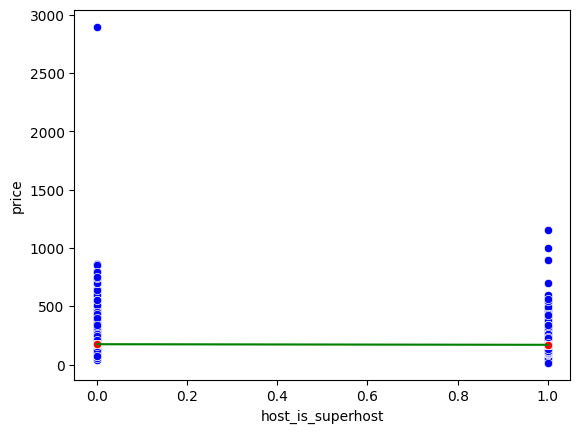

In [76]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=data_2)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=data_2)
sns.lineplot(x='host_is_superhost', y='Predicciones', color="green", data=data_2)

In [77]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00042214205587998155

In [78]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02054609587926576

In [79]:
#Eliminamos columna de tipo string
data2=data_2.drop(data.select_dtypes(include=['object']).columns, axis=1)

In [ ]:
sns.pairplot(data2)

In [ ]:
#Correlaci9ones entre variables
Corr_Factors=data2.corr()
Corr_Factors

In [82]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.020546,1.000000,0.178460,0.263143,0.193709,0.032513
price,0.020546,1.000000,0.020546,0.012546,0.037768,0.040057,0.025445
host_is_superhost,1.000000,0.020546,1.000000,0.178460,0.263143,0.193709,0.032513
host_acceptance_rate,0.178460,0.012546,0.178460,1.000000,0.004703,0.022903,0.190376
review_scores_cleanliness,0.263143,0.037768,0.263143,0.004703,1.000000,0.005358,0.095735
host_identity_verified,0.193709,0.040057,0.193709,0.022903,0.005358,1.000000,0.155858
instant_bookable,0.032513,0.025445,0.032513,0.190376,0.095735,0.155858,1.000000


In [ ]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

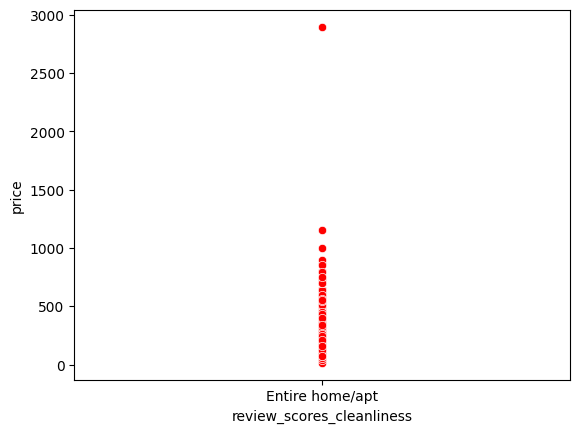

In [84]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data_3)

In [ ]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['review_scores_cleanliness']]
Var_Dep = data_3['price']

In [89]:
model=LinearRegression()

In [90]:
type(model)

sklearn.linear_model._base.LinearRegression

In [91]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [92]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([21.78994386]),
 'rank_': 1,
 'singular_': array([9.25554186]),
 'intercept_': 67.83578555779813}

**modelo matemático**

In [93]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0014264293923034188

In [94]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([176.13180653, 176.78550485, 171.9917172 , ..., 171.60370247,
       171.60370247, 171.60370247])

In [95]:
#Se inserta la columna "Predicciones" al dataframe
data_3.insert(0, 'Predicciones',y_pred)
data_3

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,176.131807,Entire home/apt,185.0,100%,1.0,94.0,1 bath,4.970000,1.0,0.0,Entire rental unit
1,176.785505,Entire home/apt,200.0,100%,0.0,89.0,1 bath,5.000000,1.0,0.0,Entire home
2,171.991717,Entire home/apt,66.0,100%,1.0,80.0,1 bath,4.780000,1.0,0.0,Entire home
3,174.388611,Entire home/apt,91.0,100%,0.0,93.0,1 bath,4.890000,1.0,0.0,Entire home
4,174.824410,Entire home/apt,129.0,100%,0.0,93.0,1 bath,4.910000,1.0,1.0,Entire townhouse
...,...,...,...,...,...,...,...,...,...,...,...
1743,171.603702,Entire home/apt,242.0,97%,0.0,97.0,3 baths,4.762193,1.0,1.0,Entire home
1744,171.603702,Entire home/apt,210.0,97%,0.0,97.0,4.5 baths,4.762193,1.0,0.0,Entire home
1745,171.603702,Entire home/apt,127.0,80%,0.0,23.0,1 bath,4.762193,1.0,0.0,Entire home
1746,171.603702,Entire home/apt,159.0,100%,0.0,95.0,1 bath,4.762193,1.0,0.0,Entire rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

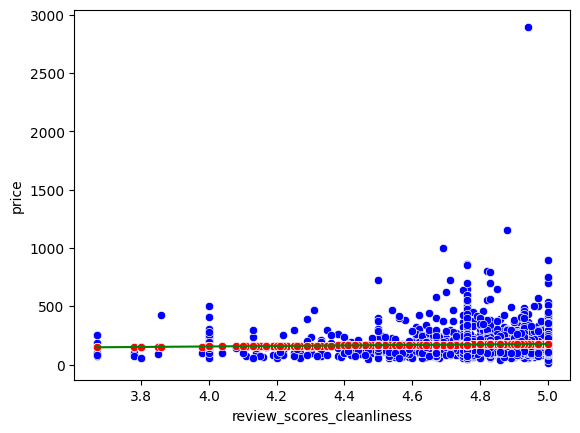

In [97]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=data_3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=data_3)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=data_3)

In [98]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0014264293923034188

In [99]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03776810019452155

In [100]:
#Eliminamos columna de tipo string
data3=data_3.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

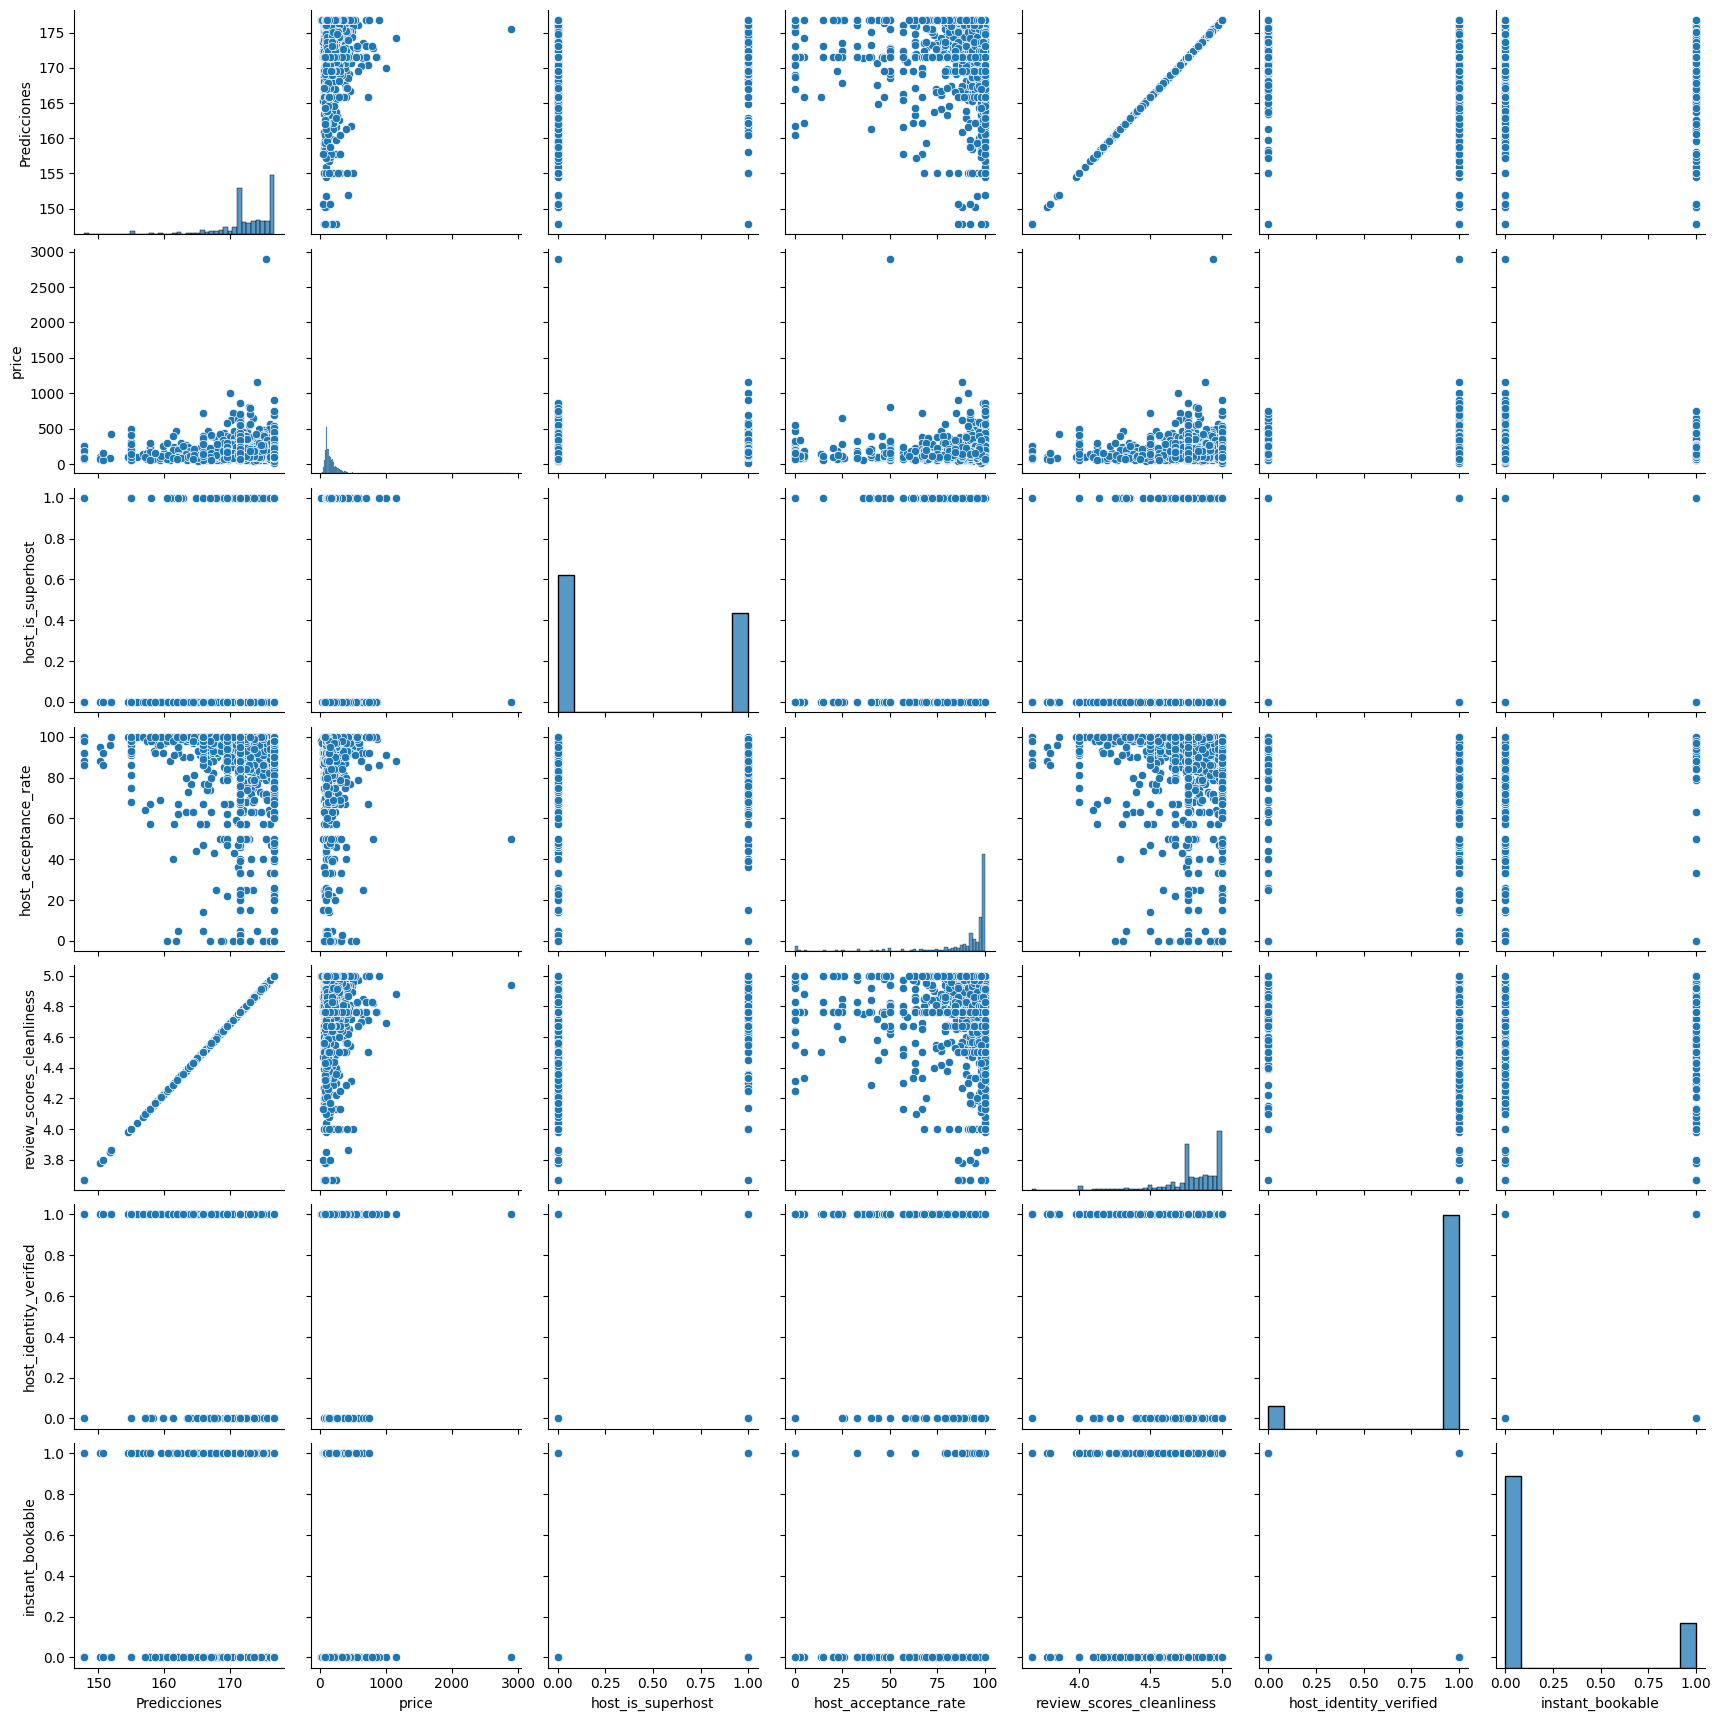

In [101]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [103]:
#Correlaci9ones entre variables
Corr_Factors=data3.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.037768,0.263143,0.004703,1.000000,0.005358,-0.095735
price,0.037768,1.000000,-0.020546,0.012546,0.037768,-0.040057,0.025445
host_is_superhost,0.263143,-0.020546,1.000000,0.178460,0.263143,0.193709,-0.032513
host_acceptance_rate,0.004703,0.012546,0.178460,1.000000,0.004703,-0.022903,0.190376
review_scores_cleanliness,1.000000,0.037768,0.263143,0.004703,1.000000,0.005358,-0.095735
host_identity_verified,0.005358,-0.040057,0.193709,-0.022903,0.005358,1.000000,-0.155858
instant_bookable,-0.095735,0.025445,-0.032513,0.190376,-0.095735,-0.155858,1.000000


In [104]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.037768,0.263143,0.004703,1.000000,0.005358,0.095735
price,0.037768,1.000000,0.020546,0.012546,0.037768,0.040057,0.025445
host_is_superhost,0.263143,0.020546,1.000000,0.178460,0.263143,0.193709,0.032513
host_acceptance_rate,0.004703,0.012546,0.178460,1.000000,0.004703,0.022903,0.190376
review_scores_cleanliness,1.000000,0.037768,0.263143,0.004703,1.000000,0.005358,0.095735
host_identity_verified,0.005358,0.040057,0.193709,0.022903,0.005358,1.000000,0.155858
instant_bookable,0.095735,0.025445,0.032513,0.190376,0.095735,0.155858,1.000000


<Axes: >

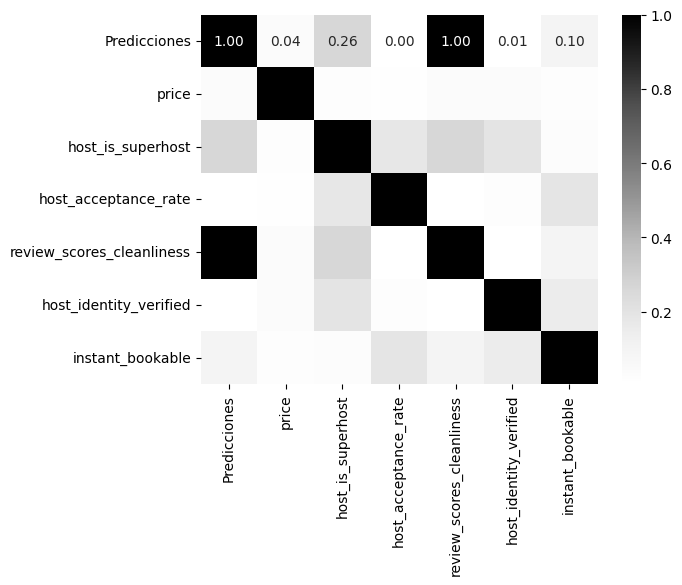

In [105]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs host_identity_verified**

<Axes: xlabel='host_identity_verified', ylabel='price'>

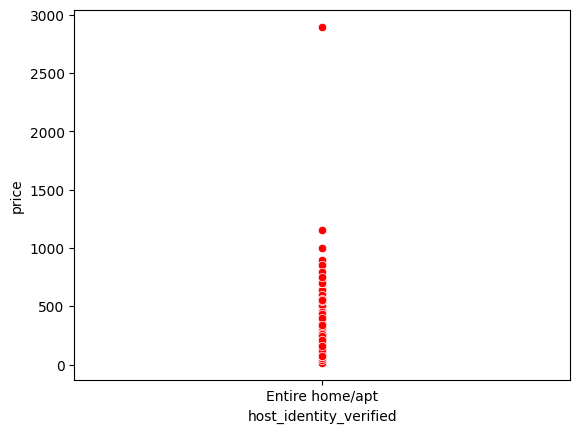

In [106]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=data_4)
sns.scatterplot(x='room_type', y='price', color='red', data=data_4)

In [107]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['host_identity_verified']]
Var_Dep = data_3['price']

In [108]:
model=LinearRegression()

In [109]:
type(model)

sklearn.linear_model._base.LinearRegression

In [110]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [111]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-17.40422002]),
 'rank_': 1,
 'singular_': array([12.29004453]),
 'intercept_': 188.07784431137728}

**modelo matemático**

In [112]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.001604539455320686

In [113]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([170.67362429, 170.67362429, 170.67362429, ..., 170.67362429,
       170.67362429, 170.67362429])

In [114]:
#Se inserta la columna "Predicciones" al dataframe
data_4.insert(0, 'Predicciones',y_pred)
data_4

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,170.673624,Entire home/apt,185.0,100%,1.0,94.0,1 bath,4.970000,1.0,0.0,Entire rental unit
1,170.673624,Entire home/apt,200.0,100%,0.0,89.0,1 bath,5.000000,1.0,0.0,Entire home
2,170.673624,Entire home/apt,66.0,100%,1.0,80.0,1 bath,4.780000,1.0,0.0,Entire home
3,170.673624,Entire home/apt,91.0,100%,0.0,93.0,1 bath,4.890000,1.0,0.0,Entire home
4,170.673624,Entire home/apt,129.0,100%,0.0,93.0,1 bath,4.910000,1.0,1.0,Entire townhouse
...,...,...,...,...,...,...,...,...,...,...,...
1743,170.673624,Entire home/apt,242.0,97%,0.0,97.0,3 baths,4.762193,1.0,1.0,Entire home
1744,170.673624,Entire home/apt,210.0,97%,0.0,97.0,4.5 baths,4.762193,1.0,0.0,Entire home
1745,170.673624,Entire home/apt,127.0,80%,0.0,23.0,1 bath,4.762193,1.0,0.0,Entire home
1746,170.673624,Entire home/apt,159.0,100%,0.0,95.0,1 bath,4.762193,1.0,0.0,Entire rental unit


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_identity_verified', ylabel='price'>

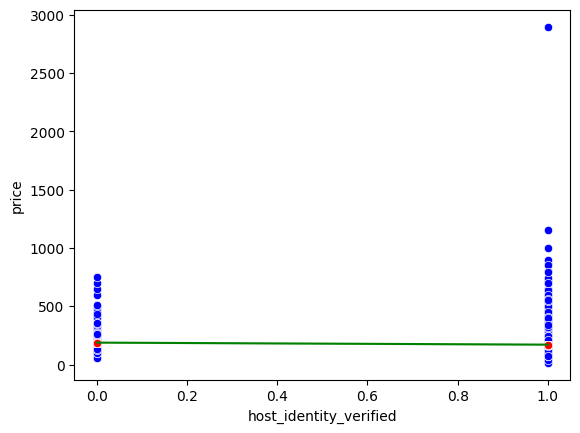

In [116]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=data_4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=data_4)
sns.lineplot(x='host_identity_verified', y='Predicciones', color="green", data=data_4)


In [117]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.001604539455320686

In [118]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.04005670300112936

In [119]:
#Eliminamos columna de tipo string
data4=data_4.drop(data.select_dtypes(include=['object']).columns, axis=1)


In [120]:
#Correlaci9ones entre variables
Corr_Factors=data4.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.040057,-0.193709,0.022903,-0.005358,-1.000000,0.155858
price,0.040057,1.000000,-0.020546,0.012546,0.037768,-0.040057,0.025445
host_is_superhost,-0.193709,-0.020546,1.000000,0.178460,0.263143,0.193709,-0.032513
host_acceptance_rate,0.022903,0.012546,0.178460,1.000000,0.004703,-0.022903,0.190376
review_scores_cleanliness,-0.005358,0.037768,0.263143,0.004703,1.000000,0.005358,-0.095735
host_identity_verified,-1.000000,-0.040057,0.193709,-0.022903,0.005358,1.000000,-0.155858
instant_bookable,0.155858,0.025445,-0.032513,0.190376,-0.095735,-0.155858,1.000000


In [121]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.040057,0.193709,0.022903,0.005358,1.000000,0.155858
price,0.040057,1.000000,0.020546,0.012546,0.037768,0.040057,0.025445
host_is_superhost,0.193709,0.020546,1.000000,0.178460,0.263143,0.193709,0.032513
host_acceptance_rate,0.022903,0.012546,0.178460,1.000000,0.004703,0.022903,0.190376
review_scores_cleanliness,0.005358,0.037768,0.263143,0.004703,1.000000,0.005358,0.095735
host_identity_verified,1.000000,0.040057,0.193709,0.022903,0.005358,1.000000,0.155858
instant_bookable,0.155858,0.025445,0.032513,0.190376,0.095735,0.155858,1.000000


<Axes: >

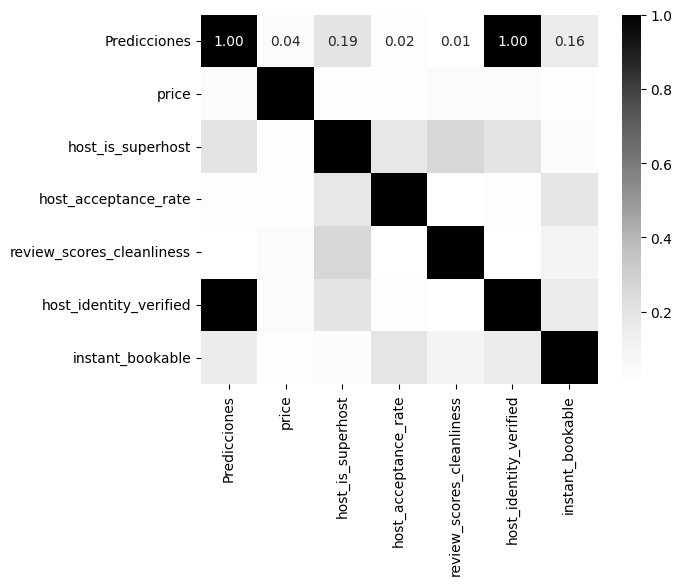

In [122]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

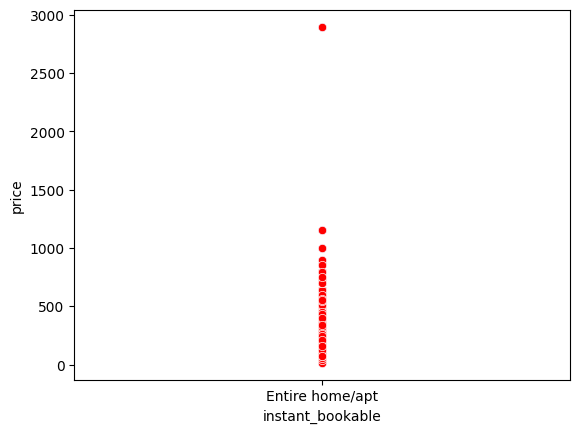

In [124]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=data_5)
sns.scatterplot(x='room_type', y='price', color='red', data=data_5)

In [125]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_5[['instant_bookable']]
Var_Dep = data_5['price']

In [126]:
model=LinearRegression()

type(model)

sklearn.linear_model._base.LinearRegression

In [127]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [128]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.29472077]),
 'rank_': 1,
 'singular_': array([16.38053975]),
 'intercept_': 170.76570218772054}

In [129]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0006474322302221225

In [130]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([170.76570219, 170.76570219, 170.76570219, ..., 170.76570219,
       170.76570219, 170.76570219])

In [ ]:
#Se inserta la columna "Predicciones" al dataframe
# data_5.insert(0, 'Predicciones',y_pred)
# data_5

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='instant_bookable', ylabel='price'>

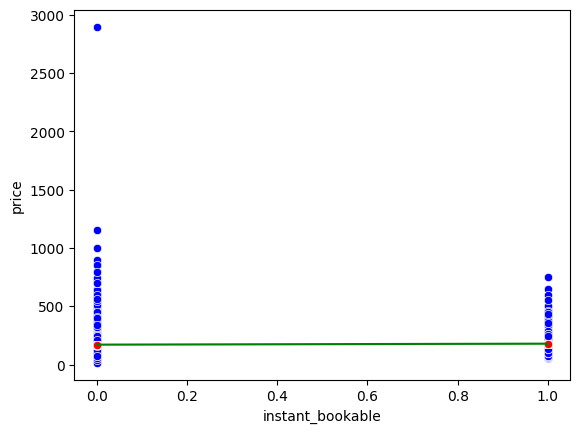

In [ ]:
#Se inserta la columna "Predicciones" al dataframe
# data_5.insert(0, 'Predicciones',y_pred)
# data_5

In [133]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0006474322302221225

In [134]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02544468962715251

In [135]:
#Eliminamos columna de tipo string
data5=data_5.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

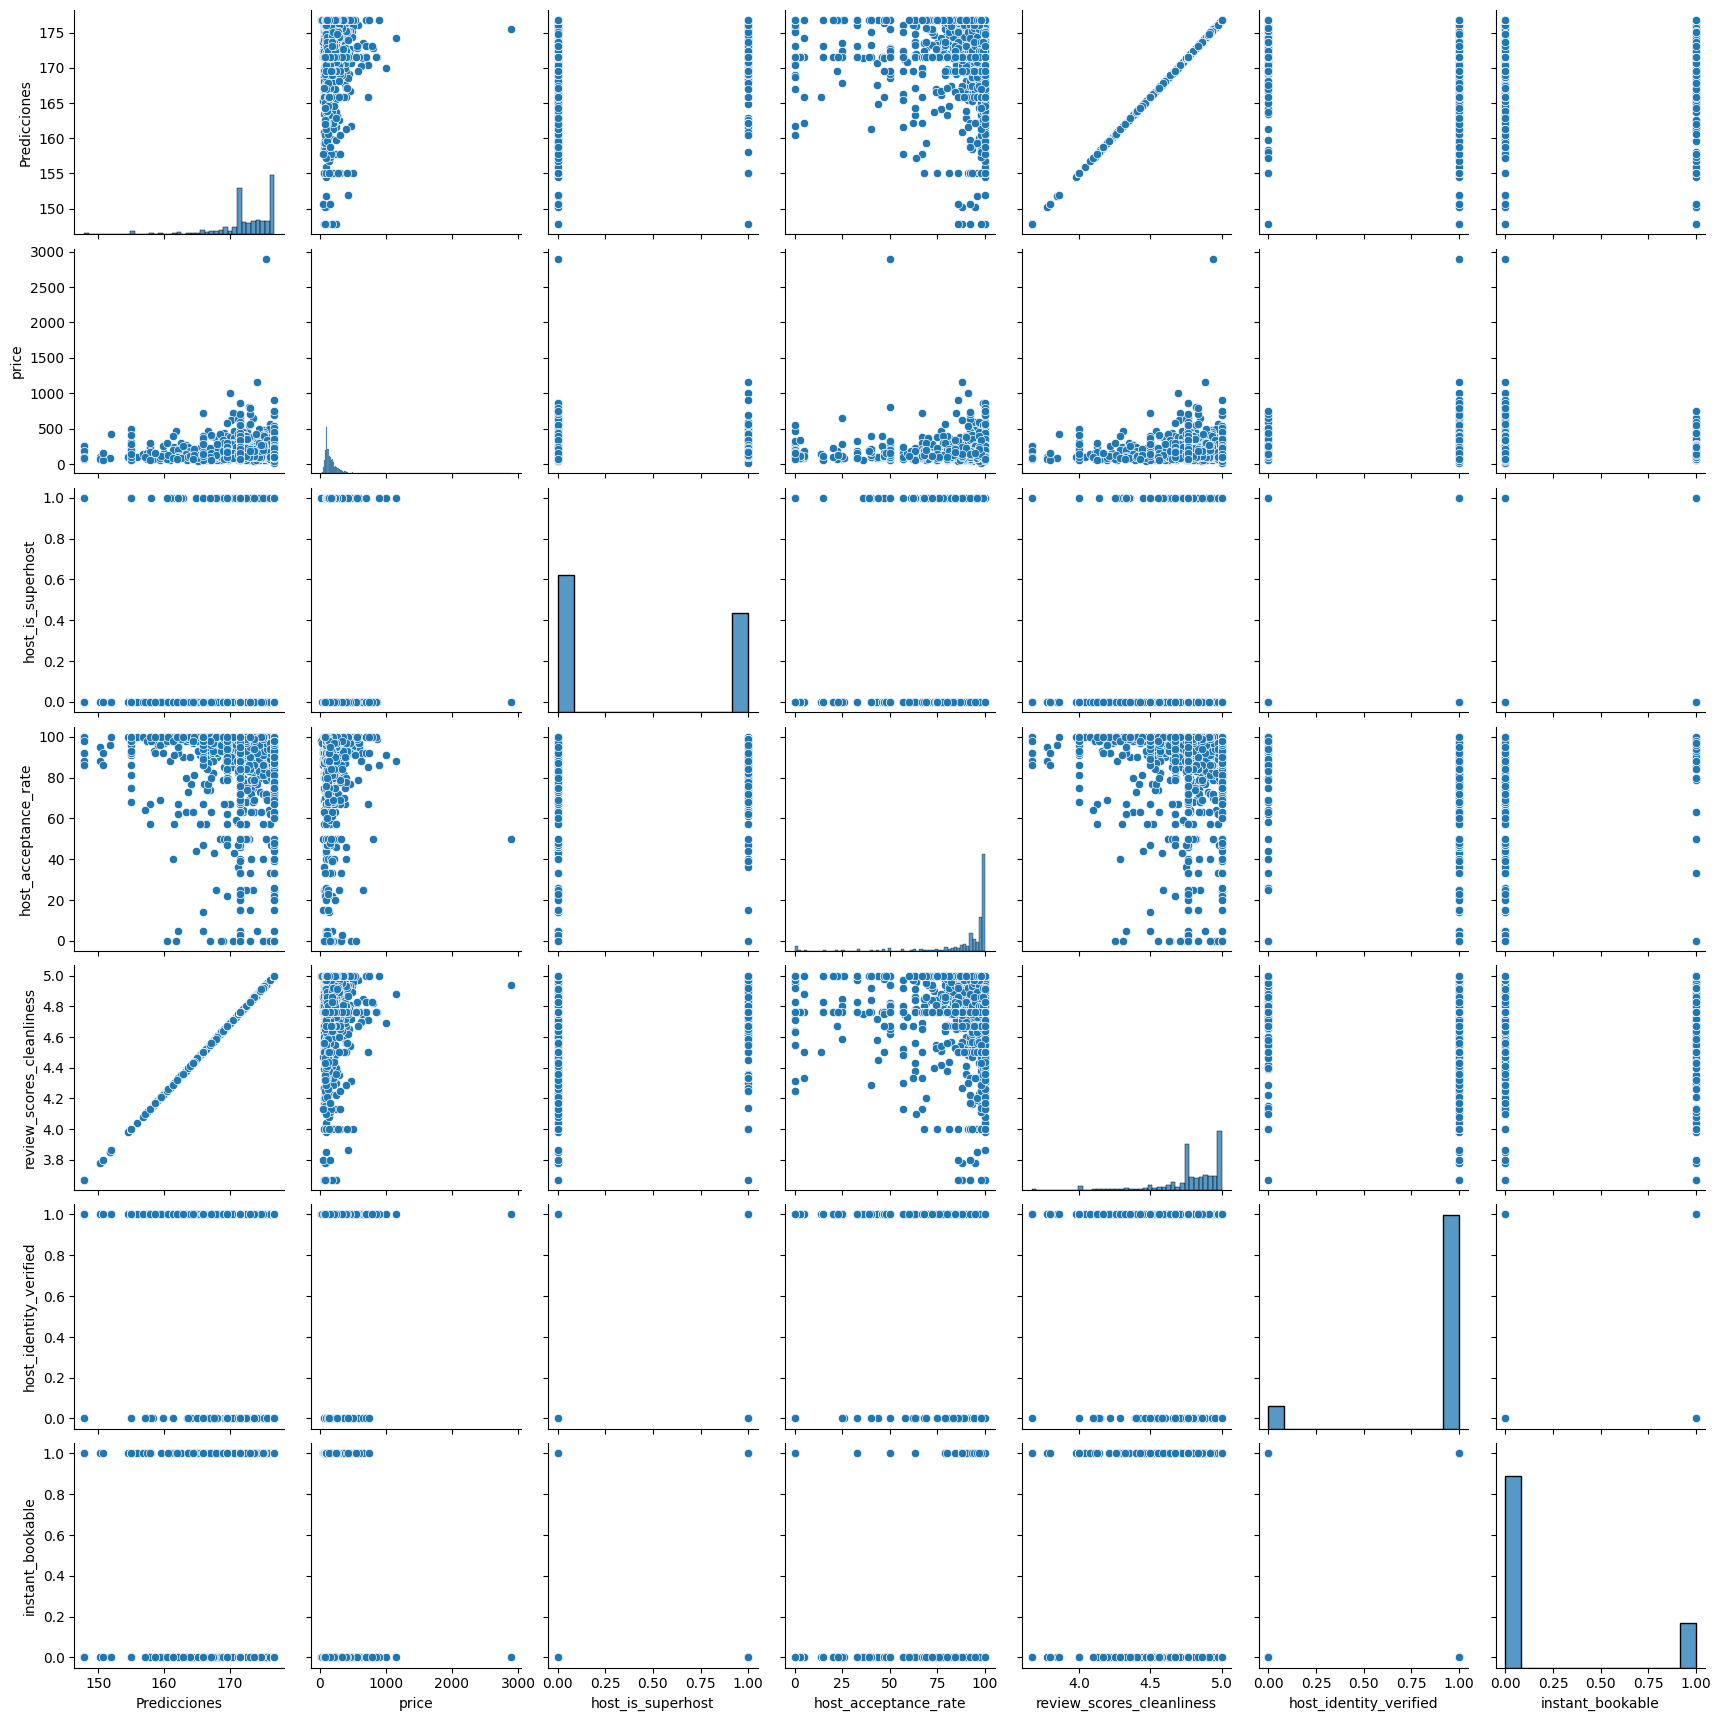

In [136]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [137]:
#Correlaci9ones entre variables
Corr_Factors=data5.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.025445,-0.032513,0.190376,-0.095735,-0.155858,1.000000
price,0.025445,1.000000,-0.020546,0.012546,0.037768,-0.040057,0.025445
host_is_superhost,-0.032513,-0.020546,1.000000,0.178460,0.263143,0.193709,-0.032513
host_acceptance_rate,0.190376,0.012546,0.178460,1.000000,0.004703,-0.022903,0.190376
review_scores_cleanliness,-0.095735,0.037768,0.263143,0.004703,1.000000,0.005358,-0.095735
host_identity_verified,-0.155858,-0.040057,0.193709,-0.022903,0.005358,1.000000,-0.155858
instant_bookable,1.000000,0.025445,-0.032513,0.190376,-0.095735,-0.155858,1.000000


In [140]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1


,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.025445,0.032513,0.190376,0.095735,0.155858,1.000000
price,0.025445,1.000000,0.020546,0.012546,0.037768,0.040057,0.025445
host_is_superhost,0.032513,0.020546,1.000000,0.178460,0.263143,0.193709,0.032513
host_acceptance_rate,0.190376,0.012546,0.178460,1.000000,0.004703,0.022903,0.190376
review_scores_cleanliness,0.095735,0.037768,0.263143,0.004703,1.000000,0.005358,0.095735
host_identity_verified,0.155858,0.040057,0.193709,0.022903,0.005358,1.000000,0.155858
instant_bookable,1.000000,0.025445,0.032513,0.190376,0.095735,0.155858,1.000000


<Axes: >

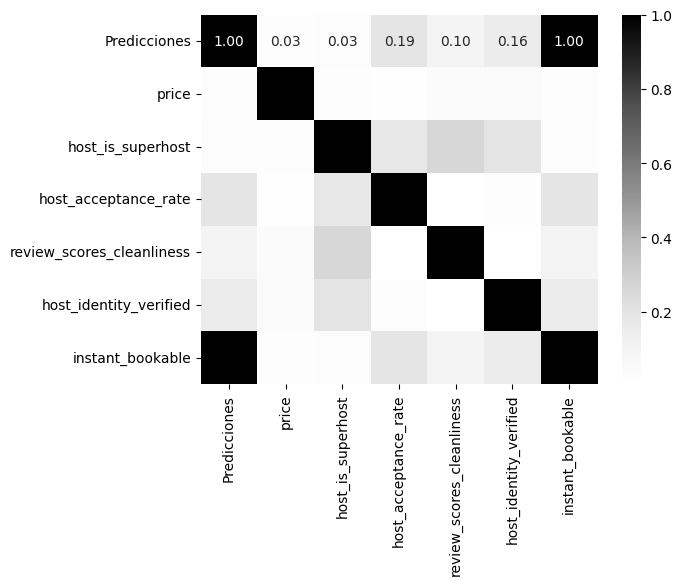

In [142]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs property_type**